In [1]:
import pandas as pd
import numpy as np
import csv as csv
import io
import os

from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
#data = pd.read_csv('/content/gdrive/My Drive/jd_role_res_corpus_V1.csv', encoding= 'unicode_escape')
headers = ["Description"] 
all_headlines = pd.read_csv("/content/gdrive/My Drive/jd_role_res_corpus_V1.csv", names = headers, sep='\t',nrows= 100) 
   

In [3]:
texts = list(set(all_headlines['Description']))
#texts = texts[:101]

In [4]:
print (texts)

['You can write quality production code;', 'Successful experience working in a fast-paced start-up work environment a plus', 'Clinical database experience preferred', 'Demonstrated experience with report creation tools (e.g., Crystal reports, SQL Server Reporting Services)', 'Experience in ESRI software key', "Cloud environment development & operations experience (e.g.We work in complementary teams comprising members from Data Science and various groups at Visa.Flexible and adaptable attitude, disciplined to manage multiple responsibilities and adjust to varied environments.).,  Exposure to mathematical programming libraries (e.g., 3+ Years‚Äô relevant working experience.You will use SAS daily and should be familiar with Tableau, SQL and/or R. Take the first step to join our team by applying now., Bachelor's degree required", 'Good knowledge of Python and/or R', ', Skills, Qualifications, and Competencies, Related work experience', ', Data Services', 'User Training', 'Complies with com

In [5]:
len(texts)

99

In [36]:
file_name = 'training.txt'
outF = open(file_name, 'w') 
for line in texts:
  outF.write(str(line))
  outF.write("\n")
outF.close()

In [22]:
!pip uninstall transformers

In [23]:
!git clone https://github.com/huggingface/transformers
#!cd transformers
#!pip install .
#!pip install transformers
#!pip install git+https://github.com/huggingface/transformers
#!pip install -r transformers/examples/language-modeling/requirements.txt
#!git clone https://github.com/huggingface/transformers

Cloning into 'transformers'...
remote: Enumerating objects: 314, done.
remote: Counting objects: 100% (314/314), done.
remote: Compressing objects: 100% (225/225), done.
remote: Total 69600 (delta 162), reused 179 (delta 76), pack-reused 69286
Receiving objects: 100% (69600/69600), 53.02 MiB | 29.59 MiB/s, done.
Resolving deltas: 100% (49254/49254), done.


In [24]:
cd transformers


/content/transformers/transformers


In [25]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean


In [26]:
!git checkout tags/v4.1.1

Note: checking out 'tags/v4.1.1'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at bfa4ccf77 Release: v4.1.1


In [27]:
!pwd

/content/transformers/transformers


In [28]:
!pip install .

Processing /content/transformers/transformers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for transformers: filename=transformers-4.1.1-cp37-none-any.whl size=1512966 sha256=7525ec685c51a84edca9a60afec611174717d511f7b7ba5975de5319f30b51ad
  Stored in directory: /tmp/pip-ephem-wheel-cache-l0mf0c0s/wheels/24/4e/ad/9bac5e50177cae64c9b8ec988ae7d7d1f114f296276d2080f5
Successfully built transformers


In [29]:
cd ..

/content/transformers


In [30]:
!pip install -r transformers/examples/language-modeling/requirements.txt

In [31]:
!pip install datasets

In [32]:
weights_dir = "output"

In [37]:
cmd = '''
python transformers/examples/language-modeling/run_clm.py \
    --model_name_or_path distilgpt2 \
    --train_file {0} \
    --overwrite_output_dir \
    --do_train \
    --num_train_epochs 3 \
    --per_device_train_batch_size 2 \
    --output_dir {1} \
 '''.format(file_name, weights_dir)

In [34]:
!pip list -v

Package                       Version        Location                               Installer
----------------------------- -------------- -------------------------------------- ---------
absl-py                       0.12.0         /usr/local/lib/python3.7/dist-packages pip      
alabaster                     0.7.12         /usr/local/lib/python3.7/dist-packages pip      
albumentations                0.1.12         /usr/local/lib/python3.7/dist-packages pip      
altair                        4.1.0          /usr/local/lib/python3.7/dist-packages pip      
appdirs                       1.4.4          /usr/local/lib/python3.7/dist-packages pip      
argon2-cffi                   20.1.0         /usr/local/lib/python3.7/dist-packages pip      
astor                         0.8.1          /usr/local/lib/python3.7/dist-packages pip      
astropy                       4.2            /usr/local/lib/python3.7/dist-packages pip      
astunparse                    1.6.3          /usr/local/lib/

In [38]:
!{cmd}

2021-04-09 15:42:19.089654: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
04/09/2021 15:42:20 - WARNING - __main__ -   Process rank: -1, device: cuda:0, n_gpu: 1distributed training: False, 16-bits training: False
04/09/2021 15:42:20 - INFO - __main__ -   Training/evaluation parameters TrainingArguments(output_dir='output', overwrite_output_dir=True, do_train=True, do_eval=False, do_predict=False, model_parallel=False, evaluation_strategy=<EvaluationStrategy.NO: 'no'>, prediction_loss_only=False, per_device_train_batch_size=2, per_device_eval_batch_size=8, per_gpu_train_batch_size=None, per_gpu_eval_batch_size=None, gradient_accumulation_steps=1, eval_accumulation_steps=None, learning_rate=5e-05, weight_decay=0.0, adam_beta1=0.9, adam_beta2=0.999, adam_epsilon=1e-08, max_grad_norm=1.0, num_train_epochs=3.0, max_steps=-1, warmup_steps=0, logging_dir='runs/Apr09_15-42-20_53f3188c5a26', logging_first_step=False, loggi

In [39]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
#from transformers import CTRLTokenizer, CTRLLMHeadModel


def get_model_tokenizer(weights_dir, device = 'cuda'):
    print("Loading Model ...")
    model = GPT2LMHeadModel.from_pretrained(weights_dir)
    #model = CTRLLMHeadModel.from_pretrained(weights_dir)
    model.to('cuda')
    print("Model Loaded ...")
    tokenizer = GPT2Tokenizer.from_pretrained(weights_dir)
    #tokenizer = CTRLTokenizer.from_pretrained(weights_dir)
    return model, tokenizer


def generate_messages(
    model,
    tokenizer,
    prompt_text,
    stop_token,
    length,
    num_return_sequences,
    temperature = 0.7,
    k=20,
    p=0.9,
    repetition_penalty = 1.0,
    device = 'cuda'
):

    MAX_LENGTH = int(10000)
    def adjust_length_to_model(length, max_sequence_length):
        if length < 0 and max_sequence_length > 0:
            length = max_sequence_length
        elif 0 < max_sequence_length < length:
            length = max_sequence_length  # No generation bigger than model size
        elif length < 0:
            length = MAX_LENGTH  # avoid infinite loop
        return length
        
    length = adjust_length_to_model(length=length, max_sequence_length=model.config.max_position_embeddings)
    encoded_prompt = tokenizer.encode(prompt_text, add_special_tokens=False, return_tensors="pt")
    
    encoded_prompt = encoded_prompt.to(device)

    output_sequences = model.generate(
            input_ids=encoded_prompt,
            max_length=length + len(encoded_prompt[0]),
            min_length=length,
            temperature=temperature,
            top_k=k,
            top_p=p,
            repetition_penalty=repetition_penalty,
            num_return_sequences=num_return_sequences,
            do_sample=True,
        )

    if len(output_sequences.shape) > 2:
        output_sequences.squeeze_()

    generated_sequences = []

    for generated_sequence_idx, generated_sequence in enumerate(output_sequences):
        #print("=== GENERATED SEQUENCE {} ===".format(generated_sequence_idx + 1))
        generated_sequence = generated_sequence.tolist()

        # Decode text
        text = tokenizer.decode(generated_sequence, clean_up_tokenization_spaces=True)

        # Remove all text after the stop token
        text = text[: text.find(stop_token) if stop_token else None]

        # Add the prompt at the beginning of the sequence. Remove the excess text that was used for pre-processing
        total_sequence = (
            prompt_text + text[len(tokenizer.decode(encoded_prompt[0], clean_up_tokenization_spaces=True)) :]
        )

        generated_sequences.append(total_sequence)
    return generated_sequences


In [40]:
model, tokenizer = get_model_tokenizer(weights_dir, device = 'cuda')


Loading Model ...
Model Loaded ...


In [41]:
temperature = 1.0
k=400
p=0.95
repetition_penalty = 1.0
num_return_sequences = 3
length = 100
stop_token = '|EndOfText|'
prompt_text = "Machine learning"

In [42]:
%%time
generate_messages(
    model,
    tokenizer,
    prompt_text,
    stop_token,
    length,
    num_return_sequences,
    temperature = temperature,
    k=k,
    p=p,
    repetition_penalty = repetition_penalty
  )

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


CPU times: user 1.05 s, sys: 186 ms, total: 1.24 s
Wall time: 1.24 s


['Machine learning features.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n',
 'Machine learning. How to generate model datasets using pklearn has been published in the best-selling paper of the year 2017, from National Science Foundation School of Medicine at Stanford University. In this report, we use ‐\\−5\\−5\\�{1,4}” of GATS (GATS) data in real-time with full R&D capabilities, to expand our understanding of deep-learning systems across computing.\n\n\n\n\n\n\n\n\n\n',
 "Machine learning to use the functions of our most important parts of cognitive science: learning to recognize facts and value them in ways that reflect reality. Knowledge of a cognitive science perspective has a wide range of potential applications. Now that cognitive scientists need to understand each of the appropriate questions in the context of the neuroscience, comp

In [43]:

#model.eval()
! pip install transformers

In [44]:
pip install fastai --upgrade

Requirement already up-to-date: fastai in /usr/local/lib/python3.7/dist-packages (2.3.0)


In [62]:
import sys
import time
def tokenize(texts):
    toks = tokenizer.tokenize(texts)
    return tensor(tokenizer.convert_tokens_to_ids(toks))

tokenized = [tokenize(t) for t in progress_bar(texts)]

In [63]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [64]:
from fastai.text.all import *
from fastai.metrics import *
from fastai.vision import *
from sklearn.model_selection import train_test_split


df_train,df_valid =  train_test_split(all_headlines,test_size=0.2,train_size=0.8)
splits = [list(range_of(df_train)), list(range(len(df_train), len(texts)))]
tls_lm = TfmdLists(texts,TransformersTokenizer(tokenizer),dl_type=LMDataLoader)
bs = 2
sl = 4
dls = tls_lm.dataloaders(bs=bs, seq_len=sl)
dls.show_batch(max_n=2)


,text,text_
0,Create data pipelines using,data pipelines using big
1,tools and resources available,and resources available to


In [55]:
df_train[:1]

,Description
1,Define & implement Policies & SOPs


In [65]:
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]

In [67]:
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), cbs=[DropOutput], metrics=Perplexity()).to_fp16()

In [58]:
learn.validate()

/usr/local/lib/python3.7/dist-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


(#2) [None,None]

SuggestedLRs(lr_min=0.025118863582611083, lr_steep=0.2089296132326126)

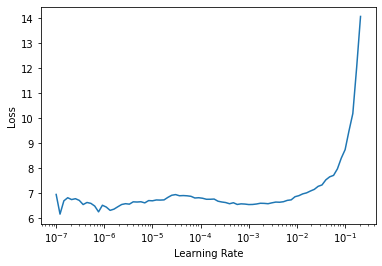

In [59]:
learn.lr_find()

In [60]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,perplexity,time
0,7.116145,None,None,00:31


/usr/local/lib/python3.7/dist-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,perplexity,time
0,5.529880,None,None,00:32
1,5.181194,None,None,00:31
2,4.344099,None,None,00:32
3,2.745091,None,None,00:32
4,1.937003,None,None,00:31


In [ ]:
learn.fit_one_cycle(1, 1e-4)

epoch,train_loss,valid_loss,perplexity,time
0,6.707149,None,None,00:01


/usr/local/lib/python3.7/dist-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


In [46]:
!pip install git+https://github.com/fastai/fastai2.git

  Cloning https://github.com/fastai/fastai2.git to /tmp/pip-req-build-nbkmoscg
  Running command git clone -q https://github.com/fastai/fastai2.git /tmp/pip-req-build-nbkmoscg
  Running command git submodule update --init --recursive -q
  Created wheel for fastai2: filename=fastai2-0.0.30-cp37-none-any.whl size=177979 sha256=7883657e69b40147831603eff5ebe65b1cce2a12652365ea53188fa7fd9a443e
  Stored in directory: /tmp/pip-ephem-wheel-cache-tein63ou/wheels/38/fd/31/ec7df01a47c0c9fafe85a1af76b59a86caf47ec649710affa8
Successfully built fastai2


In [47]:
!pip install -r transformers/examples/language-modeling/requirements.txt

In [48]:
!pip install git+https://github.com/fastai/fastcore.git

  Cloning https://github.com/fastai/fastcore.git to /tmp/pip-req-build-seh7k47u
  Running command git clone -q https://github.com/fastai/fastcore.git /tmp/pip-req-build-seh7k47u
  Created wheel for fastcore: filename=fastcore-1.3.20-cp37-none-any.whl size=52169 sha256=bcf31e712ad8c7408f966c55f1f1bb1e066d9c689b3d186e70b21a7bd3f322b1
  Stored in directory: /tmp/pip-ephem-wheel-cache-8yxqt360/wheels/14/48/6c/a231f357ba914c97927e1a41bf0696634c632908e7f806cef5
Successfully built fastcore
  Found existing installation: fastcore 1.3.19
    Uninstalling fastcore-1.3.19:
      Successfully uninstalled fastcore-1.3.19


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

docs = generate_messages(
    model,
    tokenizer,
    prompt_text,
    stop_token,
    length,
    num_return_sequences,
    temperature = temperature,
    k=k,
    p=p,
    repetition_penalty = repetition_penalty)

print(type(docs))
docs2 = texts[:1]
print(type(docs2))


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<class 'list'>
<class 'list'>


In [42]:
def word2vec(word):
    from collections import Counter
    from math import sqrt

    # count the characters in word
    cw = Counter(word)
    # precomputes a set of the different characters
    sw = set(cw)
    # precomputes the "length" of the word vector
    lw = sqrt(sum(c*c for c in cw.values()))

    # return a tuple
    return cw, sw, lw

def cosdis(v1, v2):
    # which characters are common to the two words?
    common = v1[1].intersection(v2[1])
    # by definition of cosine distance we have
    return sum(v1[0][ch]*v2[0][ch] for ch in common)/v1[2]/v2[2]


threshold = 0.80     # if needed
for key in docs:
    for word in docs2:
        try:
            # print(key)
            # print(word)
            res = cosdis(word2vec(word), word2vec(key))
            # print(res)
            print("The cosine similarity between : {} and : {} is: {}".format(word, key, res*100))
            # if res > threshold:
            #     print("Found a word with cosine distance > 80 : {} with original word: {}".format(word, key))
        except IndexError:
            pass

The cosine similarity between : Proficiency in developing complex SQL queries and : Machine learning projects to see and share visual learners with others!






You can learn how to begin your product through our series of best practices on Building Good Behaviour. We take so many risks and we have managed that and are here to help!
And for those of you not familiar with our growing in education, this post is for you.
Think of the advice that is well-received by our students. In the comments section of our book, learn to draw from ou is: 79.85830237250502
The cosine similarity between : Proficiency in developing complex SQL queries and : Machine learning, working with research and well-equipped technology.
























































































 is: 16.188570007365875
The cosine similarity between : Proficiency in developing complex SQL queries and : Machine learning using the Knowledge Base model from StackOverflow. We're developing a 